# Clustering, K-Means

<h3>Clustering: Intelligence is the capability of grouping similar objects  </h3>
<b> Clustering groups "unlabled" data into "clusters" of similar inputs  </b>


![img](./assets/Lecture_11/first_example.png)

### Difference between classification (supervised) and clustering (unsupervised)

  

![img](./assets/Lecture_11/classvsclust.png)

<b> Label understanding: </b> <br>
Unsupervised: < x ><br> vs. <br>Supervised < x, d >

### What questions you can ask ?  



<h4> Are clusters well-separated ? </h4>
Allow us to understand how difficult is our problem 

<h4> Are clusters linear separable ? </h4>


![img](./assets/Lecture_11/linearseparability1.png)

<h3> What difficulties can this lead to? </h3>

- Overlaps: clusetrs is overlaping each other. 
- Complicated shapes: wierd countour around each group. 

### Types of clustering algorithm  
             
- Need # clusters 
- don't need it. 

### K-Means algorithm := find the centroids

Centroids is (prototypes)(means) of <b>K</b> clusters. 

<h3> Implementation: </h3>

1. Randomly place K centroids
2. Assign each datapoint to its closest cluster K

![img](./assets/Lecture_11/Step2%20KMeans.png)

3. Update the centroids K

![img](./assets/Lecture_11/UpdateCentroids.png)

 
<h3> Distance calculation for update (error) </h3>

![img](./assets/Lecture_11/Step3%20KMeans.png)

<h4> K-Means convergence </h4>

![gif](./assets/Lecture_11/K-means_convergence.gif)

### Similarity grouping happen via distance measurment



![img](./assets/Lecture_11/Formulas_distance1.png)



<h3> Different types of distances. </h3>

1. Cosine similarity

![img](./assets/Lecture_11/cosine_similarity.png)

2. Hamming distance 

![img](./assets/Lecture_11/hamming_similarity.png)

3. Jacard similarity

![img](./assets/Lecture_11/jacard_similarity.png)

### When to stop ? 



1. After some iterations 
2. When centroids don't change anymore

![img](./assets/Lecture_11/centroid_dont_change.png)

3. When few/no datapoints change clusters

![img](./assets/Lecture_11/DataPointNoChange1.png)

### K-Means Problems 

 

1. Needs K. 

2. Outlier sensetive 

![img](./assets/Lecture_11/Outliers.png)

3. Hard clustering

![img](./assets/Lecture_11/SoftHardClustering.png)


### Utils 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

### Clustering Car dataset

In [3]:
dataset = pd.read_csv("./datasets/Elite Sports Cars in Data.csv")
dataset.head(10)

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN
5,BMW,GT-R,1986,Europe,new,5.4,1091,632,2135,341,...,228779,High,2,3,Medium,5274,200,13.077665,12.340516,NaN
6,Porsche,720S,1988,Asia,new,4.2,810,1222,2130,245,...,222953,Medium,4,3,Medium,5645,5000,12.895287,12.314721,Nismo
7,Nissan,720S,2020,USA,new,7.4,1189,184,1526,185,...,202882,High,2,4,Medium,12037,50,11.804131,12.220385,V-Spec
8,Chevrolet,Mustang GT,2021,Europe,new,7.4,230,302,1885,245,...,47481,Medium,1,2,Low,3899,1000,12.409679,10.768106,NaN
9,Bugatti,DBS,1992,USA,new,6.5,675,1209,1472,382,...,101321,Low,3,4,Medium,14850,5000,13.020342,11.526059,NaN


### Data processing 

In [5]:
names = [ i for i in dataset.columns if type(dataset[i].iloc[0]) in [np.int64, np.float64] ]

In [7]:
len(names)

17

In [ ]:
filtered_dataset = dataset[names]
filtered_dataset = StandardScaler().fit_transform(filtered_dataset)
PCA_features=  PCA(n_components=0.95).fit_transform(filtered_dataset)

In [15]:
clustering_dataset = pd.DataFrame(PCA_features, columns=[ f'PCA {i}' for i in range(1, len(PCA_features[0]) + 1)])

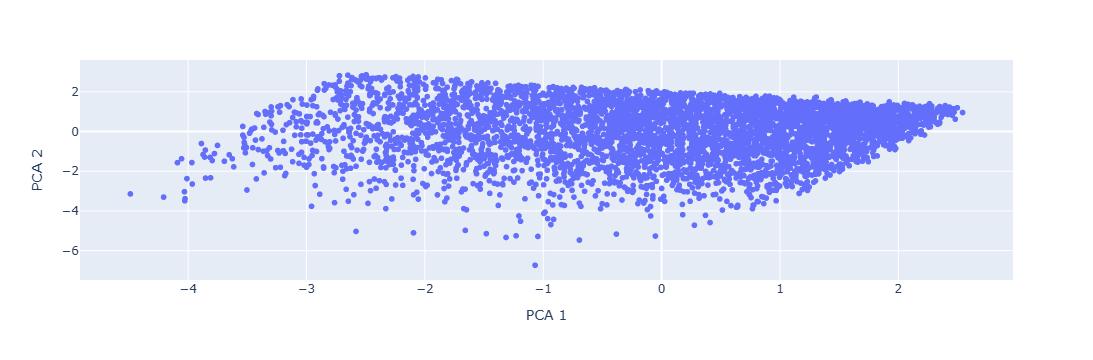

In [17]:
px.scatter(clustering_dataset, x='PCA 1', y='PCA 2')

### Silhouette method 



For each data-point we calculate s(i) using the following formula:

![img](./assets/Lecture_11/metod_silueta_formula.png)

1. a(i) — Average distance to all other points in the same cluster <br>
This shows how "similar" a point is to its cluster.

2. b(i) — Minimum average distance to points from another cluster <br>
This indicates how "far" a point is from the nearest foreign cluster.

<b> s(i) understending </b>:

- ≈ 1.0 (Our data-point well-clustered)
- ≈ 0.0	(Data-points is very close to other cluster)
- < 0 (Data-point assigned to wrong cluster)

<h3> Overall estimation </h3>

![img](./assets/Lecture_11/metod_silueta_est.png)

S - final coefficient used to select the optimal amount of clusters. 


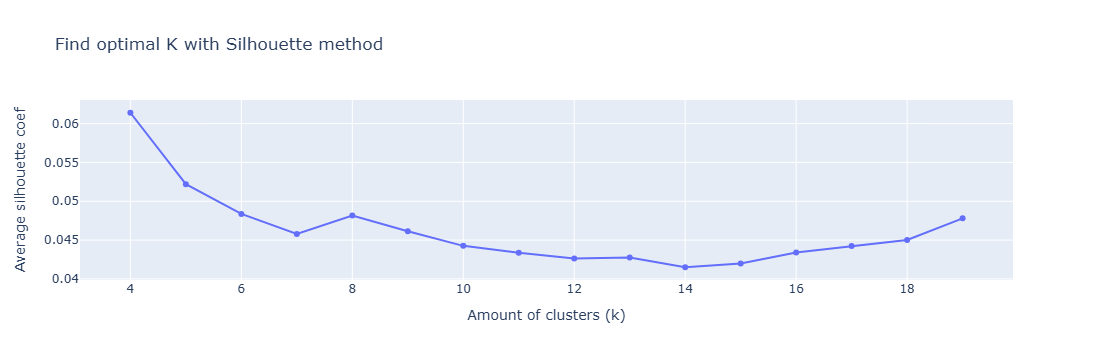

In [19]:
silhouette_avg_scores = []
k_range = range(4,20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_dataset)
    score = silhouette_score(clustering_dataset, labels)
    silhouette_avg_scores.append(score)

# Build silhouette coef graph 
fig_score = px.line(
    x=list(k_range),
    y=silhouette_avg_scores,
    markers=True,
    labels={'x': 'Amount of clusters (k)', 'y': 'Average silhouette coef'},
    title='Find optimal K with Silhouette method '
)
fig_score.show()


### Clustering with optimal K 

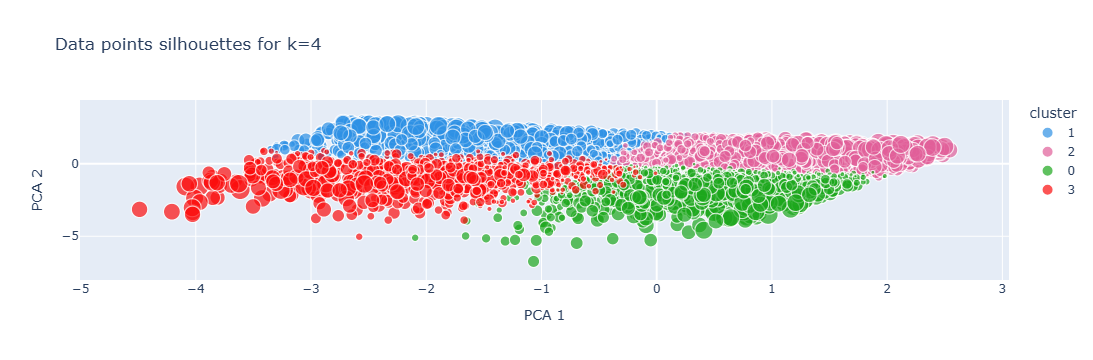

In [21]:
# Find Optimal K
optimal_k = k_range[np.argmax(silhouette_avg_scores)]
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_opt.fit_predict(clustering_dataset)
sample_silhouette_values = silhouette_samples(clustering_dataset, cluster_labels)

# Visualize datapoints for  optimal K
clustering_dataset["cluster"] = cluster_labels.astype(str)
clustering_dataset["silhouette"] = sample_silhouette_values
scaler = MinMaxScaler()
clustering_dataset["silhouette"] = scaler.fit_transform(sample_silhouette_values.reshape(-1, 1)).flatten()
fig_points = px.scatter(
    clustering_dataset,
    x="PCA 1",
    y="PCA 2",
    color="cluster",
    size="silhouette",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    title=f"Data points silhouettes for k={optimal_k}"
)
fig_points.show()

## Home task 


1. Clustering on Iris dataset

In [135]:
data = pd.read_csv("./datasets/Iris.csv", index_col='Id')

In [137]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


2. Write code

In [ ]:
# Extract features 
# EDA - Exploratory data analysis. (optional, will be a plus)
# Normalize data if needed 
# Define how many clusters you need. Use silhouette method or Elbow method or any other method.  
# Create clusters
# Run the visualization below to see the similarities between Species and clusters. 
# Be proud of your work ! 

In [ ]:
# Extract features 

In [139]:
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [ ]:
# EDA - Exploratory data analysis. (optional, will be a plus)

In [141]:
import matplotlib.pyplot as plt

In [143]:
import seaborn as sns

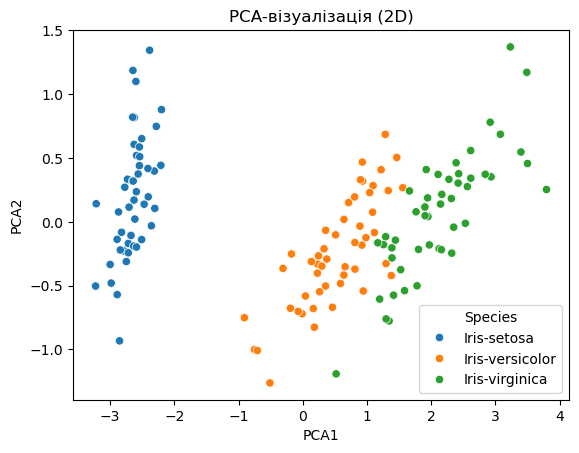

In [145]:
from sklearn.decomposition import PCA

features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Species', data=data)
plt.title("PCA-візуалізація (2D)")
plt.show()


In [171]:
from sklearn.preprocessing import RobustScaler

In [173]:
scaler = RobustScaler()

In [ ]:
scaled_features

In [175]:
scaled_features = scaler.fit_transform(features)

In [181]:
# Define how many clusters you need. Use silhouette method or Elbow method or any other method.  

In [255]:
from sklearn.metrics import silhouette_score

In [257]:
silhouette_scores = []

In [259]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

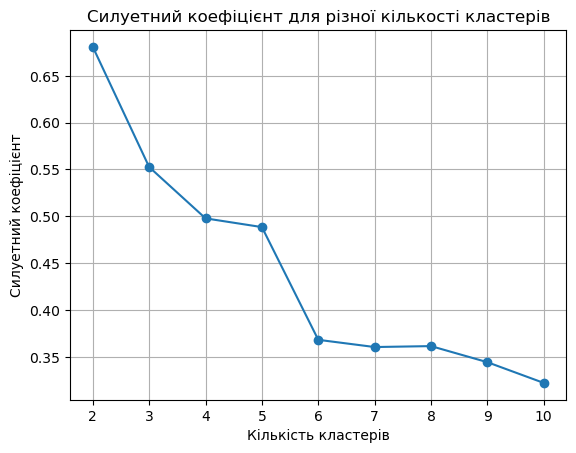

In [261]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Силуетний коефіцієнт для різної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.grid(True)
plt.show()

In [294]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 3
print(f'Оптимальна кількість кластерів: {optimal_k}')

Оптимальна кількість кластерів: 3


In [ ]:
# Create clusters

In [ ]:
# Run the visualization below to see the similarities between Species and clusters. 

In [296]:
clusters = kmeans.labels_

In [298]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



3. Draw the beautiful graphs

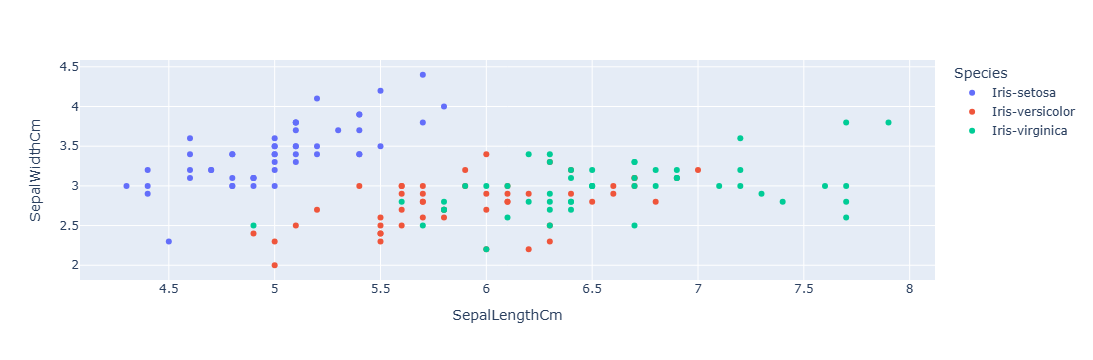

In [301]:
px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='Species')

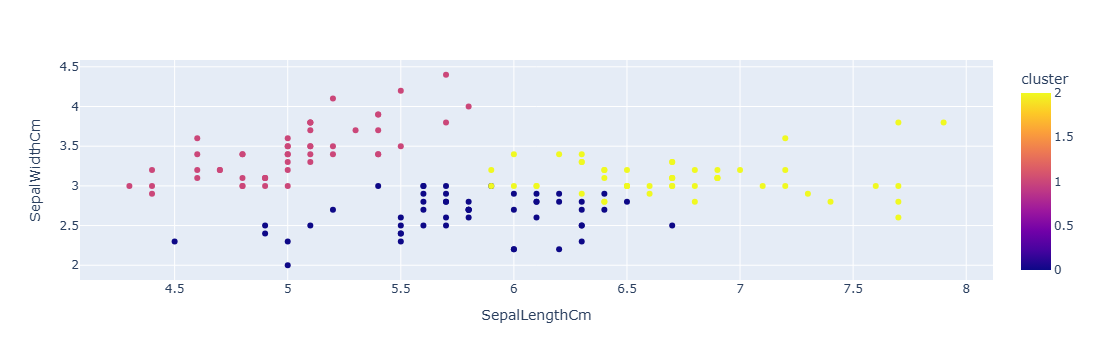

In [303]:
px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='cluster')

### Home task (alternative)

#### Steps of implementatiion
Initialize K centroids

Assign every point to closest centroid

Compute new centroids as means of samples assigned to corresponding centroid

Calculate cost

Iterate steps 2,3 till cost is stabile

Select the best clustering (with the least cost) from 100 results computed with random centroid initializations

Visualize results (clusters, centroids) for 

Note:

You may need develop couple of additional/intermediate functions
You may track cost changes to make sure the algorithm is working properly

In [ ]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)

### YOUR CODE

plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])